# King County Dataset Cleansing Data

About the Data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
kings_county = pd.read_csv("kc_house_data.csv", header=0)
kings_county.describe()
kings_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
kc=kings_county
kc_numeric = kc.select_dtypes(include=[np.number])
numeric_cols = kc_numeric.columns.values
print(numeric_cols)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']


In [4]:
kc_non_numeric = kc.select_dtypes(exclude=[np.number])
non_numeric_cols = kc_non_numeric.columns.values
print(non_numeric_cols)

['date']


Cleansing Data - Possible missing data or is null

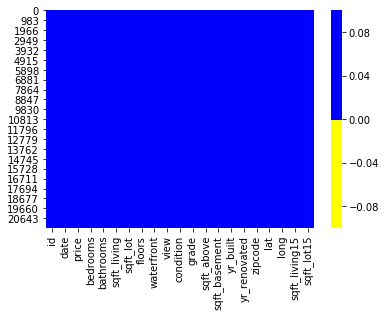

In [5]:
cols = kc.columns[:21] # first 21 columns
colours = ['yellow', 'blue'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(kc[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
for col in kc.columns:
    pct_missing = np.mean(kc[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 0.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 0.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%


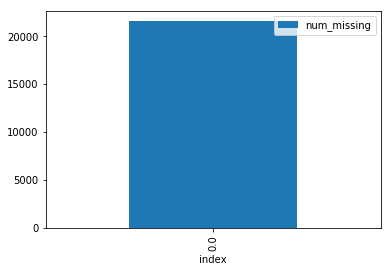

In [7]:
for col in kc.columns:
    missing = kc[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        kc['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in kc.columns if 'ismissing' in col]
kc['num_missing'] = kc[ismissing_cols].sum(axis=1)

kc['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

There are no missing data. The data looks clean.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E647C8908>,
      dtype=object)

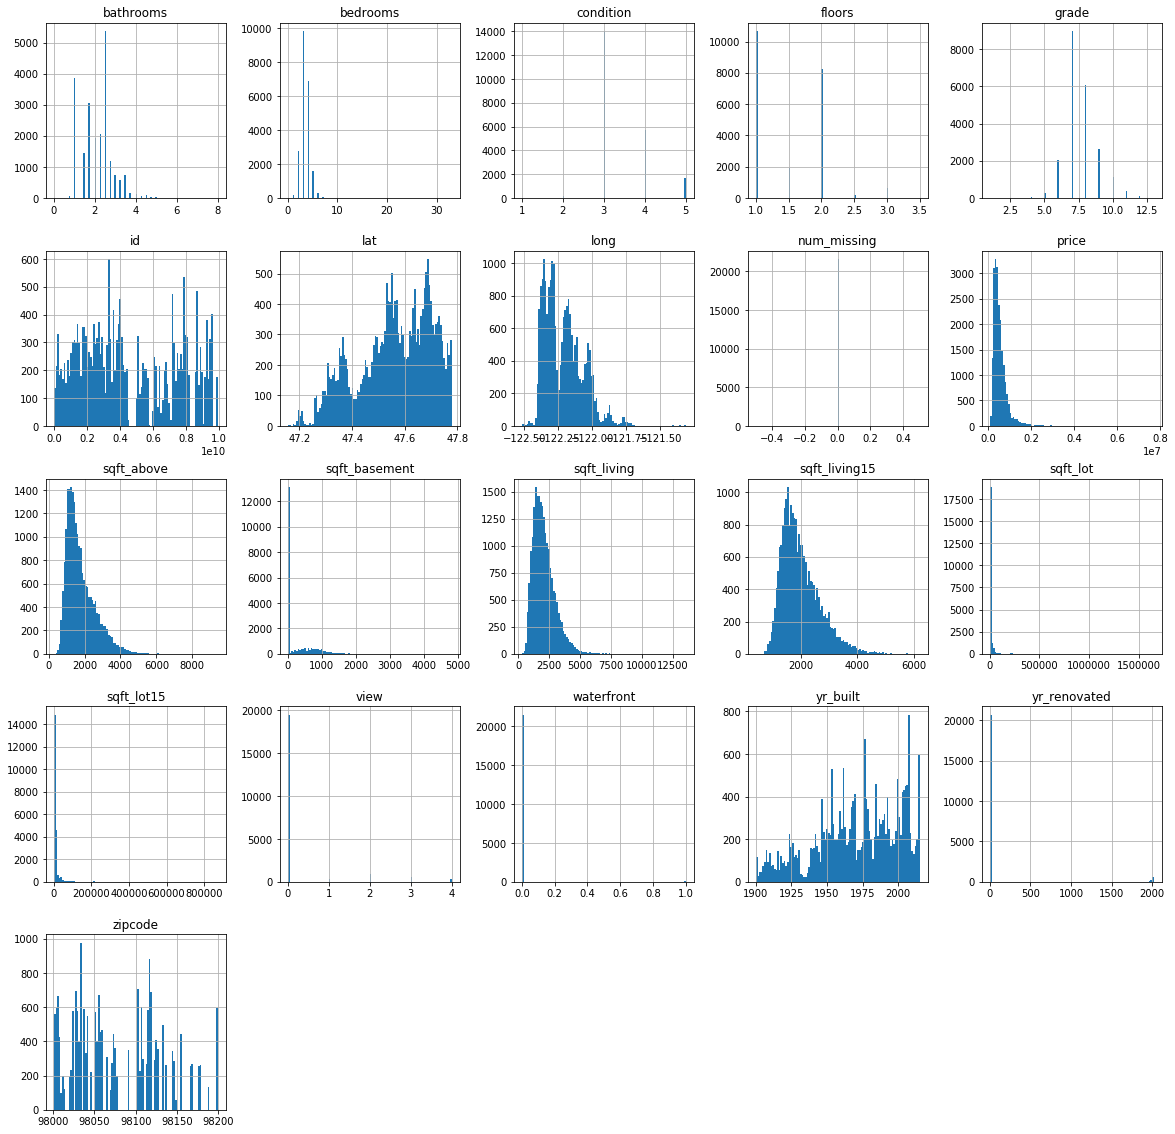

In [28]:
mpl.rcParams['figure.figsize'] = (20,20)
kc.hist(bins=100)

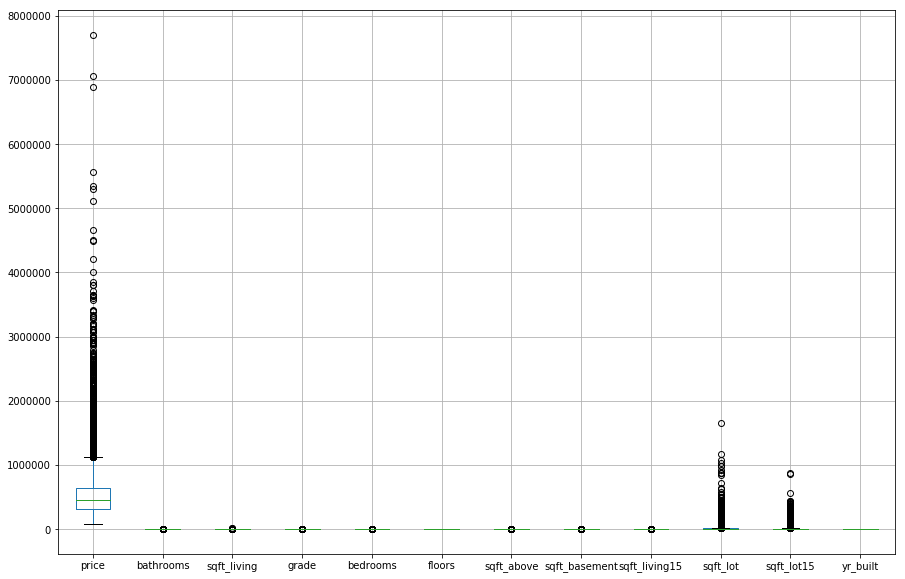

In [26]:
mpl.rcParams['figure.figsize'] = (15,10)
kc.boxplot(column=['price', 'bathrooms', 'sqft_living', 'grade', 'bedrooms', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built'])

Price, sqft_lot, and sqft_lot15 has outliers.

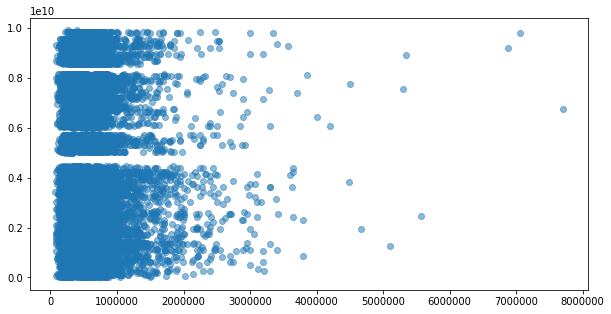

In [22]:
mpl.rcParams['figure.figsize'] = (10,5)
price_col = kc['price']
type(price_col)
y = kc['id']
plt.scatter(price_col, y, alpha=0.5)

# Insights

Text(0.5,1,"King's County House Data")

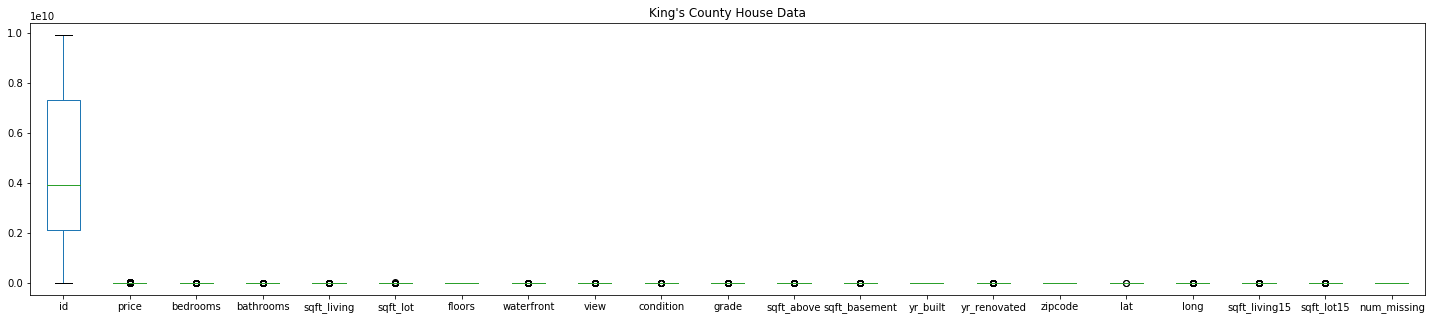

In [11]:
mpl.rcParams['figure.figsize'] = (25,5)
kings_county.plot(kind='box')
plt.title("King's County House Data")

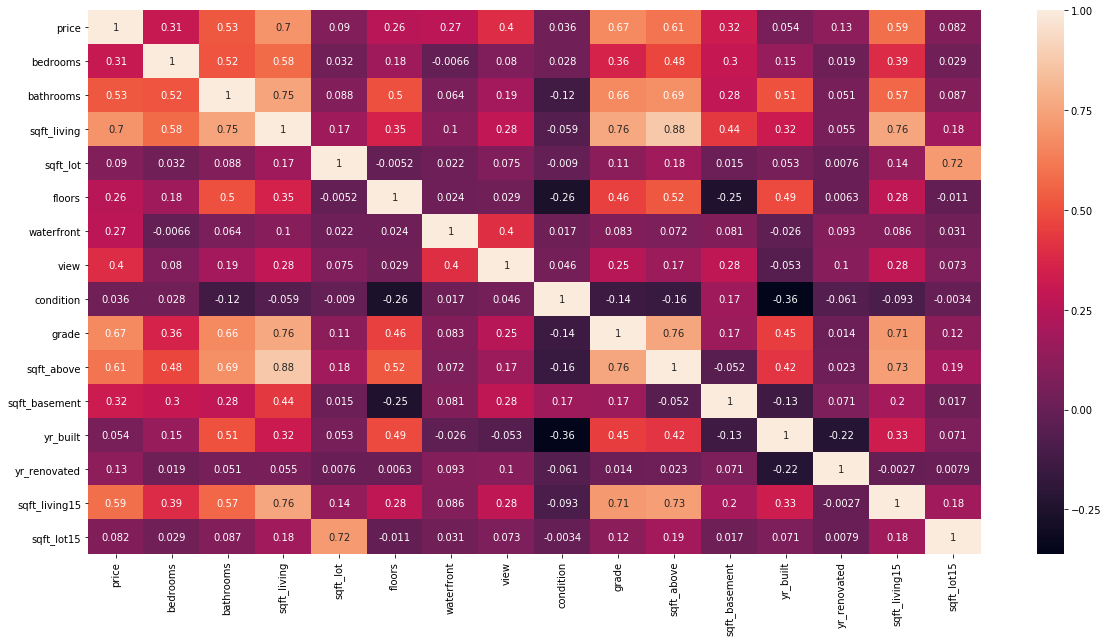

In [20]:
mpl.rcParams['figure.figsize'] = (20,10)
drop = kings_county.drop(['id', 'date', 'zipcode', 'lat', 'long'],axis=1)
corr = drop.corr()
sns.heatmap(corr, annot=True)

# Regression Model of actual price VS. predict price

In [13]:
kings_county = pd.read_csv("kc_house_data.csv", header=0)
X = kings_county[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'bedrooms', 'floors', 'waterfront', 'view', 'sqft_basement', 'sqft_living15', 'yr_renovated', 'yr_built', 'sqft_lot15', 'condition', 'sqft_lot']]
X = sm.add_constant(X)
Y = kings_county['price']

linear_regressor = sm.OLS(Y, X).fit()
linear_regressor.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2913.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:41:27   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.924e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.195e+06   1.38e+05     44.754      0.000    5.92e+06    6.47e+06
bathrooms      4.575e+04   3492.347     13.099      0.000    3.89e+04    5.26e+04
sqft_living     109.2685      2.435     44.877      0.000     104.496     114.041
grade          1.197e+05   2249.149     53.230      0.000    1.15e+05    1.24e+05
sqft_above       51.5165      2.356     21.866      0.000      46.899      56.134
bedrooms      -3.931e+04   2026.602    -19.395      0.000   -4.33e+04   -3.53e+04
floors         2.688e+04   3783.810      7.104      0.000    1.95e+04    3.43e+04
waterfront     5.791e+05   1.86e+04     31.072      0.000    5.43e+05    6.16e+05
view           4.324e+04   2273.166     19.020      0.000    3.88e+04    4.77e+04
sqft_basement    57.7520      2.782     20.759      0.000      52.299      63.205
sqft_living15    24.8733      3.600      6.909      0.000      17.816      31.930
yr_renovated     10.1596      3.914      2.596      0.009       2.488      17.831
yr_built      -3570.1592     70.988    -50.292      0.000   -3709.302   -3431.017
sqft_lot15       -0.5505      0.078     -7.025      0.000      -0.704      -0.397
condition      1.951e+04   2496.774      7.814      0.000    1.46e+04    2.44e+04
sqft_lot         -0.0016      0.051     -0.031      0.975      -0.102       0.099
==============================================================================
Omnibus:                    16329.452   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194601.451
Skew:                           3.030   Prob(JB):                         0.00
Kurtosis:                      38.914   Cond. No.                     2.77e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.23e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

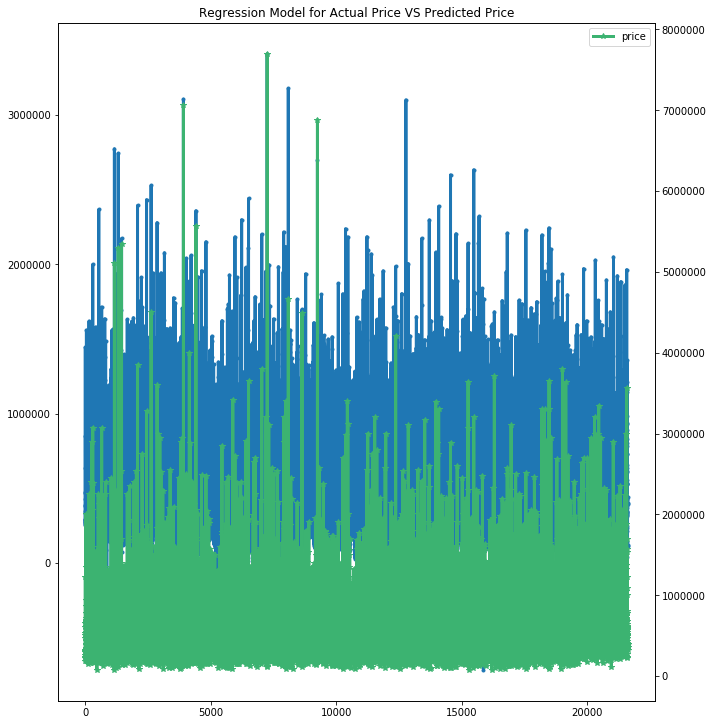

In [18]:
mpl.rcParams['figure.figsize'] = (10,10)
Y_pred = linear_regressor.predict(X)
ax = Y_pred.plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(kings_county['price'], 'mediumseagreen', linewidth=3, marker='*')
plt.tight_layout()
plt.title("Regression Model for Actual Price VS Predicted Price")
plt.legend()
plt.show()

No handles with labels found to put in legend.


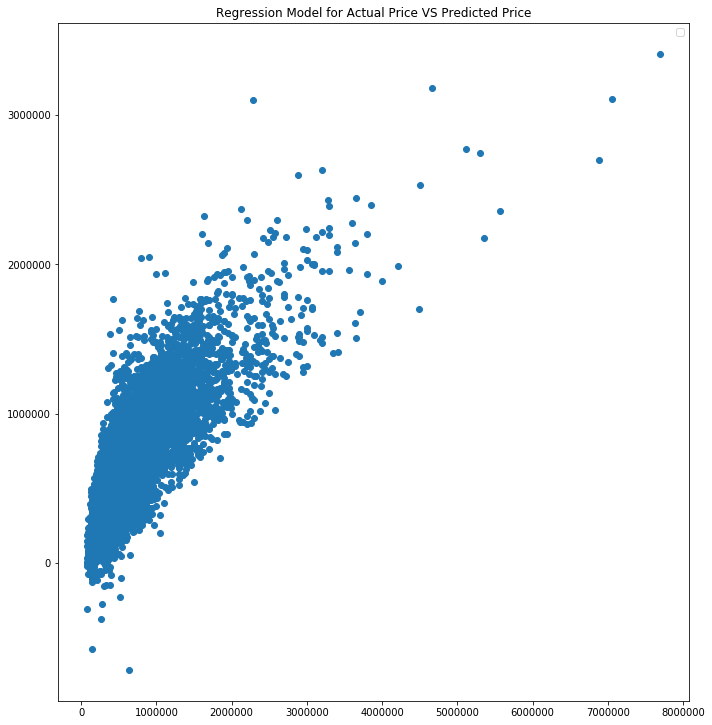

In [17]:
mpl.rcParams['figure.figsize'] = (10,10)
Y_pred = linear_regressor.predict(X)
plt.scatter(Y, Y_pred)
plt.tight_layout()
plt.title("Regression Model for Actual Price VS Predicted Price")
plt.legend()
plt.show()